In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score as ss
from sklearn.manifold import TSNE
import itertools

In [29]:
df = pd.read_csv('Facebook_metrics_Regression.csv')

In [30]:
df

,page_total_likes,post_type,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
0,139441,Photo,2,12,4,3,0.0,100,0.612360,1.047293,1.056689,0.848498
1,139441,Status,2,12,3,10,0.0,164,0.934111,1.037408,1.070180,0.920614
2,139441,Photo,3,12,3,3,0.0,80,0.638418,1.033991,1.054634,0.773190
3,139441,Photo,2,12,2,10,1.0,1777,0.357304,1.013536,1.066171,0.591867
4,139441,Photo,2,12,2,3,0.0,393,0.611028,1.056605,1.080533,0.902048
...,...,...,...,...,...,...,...,...,...,...,...,...
491,85093,Photo,3,1,7,2,0.0,84,0.965894,0.958922,0.975163,1.256401
492,81370,Photo,2,1,5,8,0.0,75,0.945996,1.026021,1.058694,1.188572
493,81370,Photo,1,1,5,2,0.0,115,0.915200,1.068155,1.093855,1.160047
494,81370,Photo,3,1,4,11,0.0,136,0.916933,1.036744,1.047004,1.178239


In [31]:
df.corr(numeric_only=True)

,page_total_likes,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
page_total_likes,1.000000,-0.101823,0.939909,0.002211,-0.143157,0.007456,0.049310,-0.390008,0.033391,0.015513,-0.372796
category,-0.101823,1.000000,-0.136785,-0.047439,-0.108710,-0.020422,0.129338,-0.262758,-0.101223,-0.162692,-0.248906
post_month,0.939909,-0.136785,1.000000,0.023594,-0.176014,-0.017820,0.021145,-0.432821,0.093104,0.073101,-0.382666
post_weekday,0.002211,-0.047439,0.023594,1.000000,0.046693,-0.003883,-0.082653,0.091790,-0.005795,-0.024623,0.005006
post_hour,-0.143157,-0.108710,-0.176014,0.046693,1.000000,-0.069849,-0.028847,0.153612,0.008162,0.024124,0.182699
paid,0.007456,-0.020422,-0.017820,-0.003883,-0.069849,1.000000,0.104414,-0.052438,-0.002231,0.036644,0.048340
total_interactions,0.049310,0.129338,0.021145,-0.082653,-0.028847,0.104414,1.000000,-0.465049,0.080253,0.129706,-0.087395
post_ratio_engaged_consumers,-0.390008,-0.262758,-0.432821,0.091790,0.153612,-0.052438,-0.465049,1.000000,-0.049155,-0.059207,0.417722
post_ratio_imp_reach_log,0.033391,-0.101223,0.093104,-0.005795,0.008162,-0.002231,0.080253,-0.049155,1.000000,0.940571,0.010886
post_ratio_imp_reach_like_log,0.015513,-0.162692,0.073101,-0.024623,0.024124,0.036644,0.129706,-0.059207,0.940571,1.000000,0.009092


In [32]:
s = StandardScaler()
X = df[['total_interactions','post_ratio_engaged_consumers','post_ratio_imp_reach_log','post_ratio_imp_reach_like_log','post_ratio_engaged_consumption_log']]
X_scaled =  s.fit_transform(X)

#### Explain DBSCAN
1. DBSCAN define some COre and Non-core points
2. Each core point will have some kind of radius and minimum number of Sample
3. To Assign a Cluster you have to Use the Core points
4. So basically core points can extends the cluster while non-core points can't they just can be assigned and thats it
5. If a Point has been Assigned it can't be re assigned to another Cluster

##### Explain Parameter OF DBSCAN
- eps:> Can be referd to as radius of Circle that is used for core points
- min_smaples:> minimum number of samples to make this point as a core point
- metric:> distance that will be used to measure if points are in EPS or Radius

In [33]:
dbscan_model = DBSCAN().fit(X_scaled)
dbscan_model

,eps,0.5
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [34]:
df['cluster'] = dbscan_model.labels_

In [35]:
X_scaled[:10,1]

array([-2.06812042,  0.57193429, -1.85430351, -4.16091345, -2.07904354,
        0.29962157, -2.57212009, -3.54777231,  0.45293063, -1.72996639])

In [36]:
df

,page_total_likes,post_type,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log,cluster
0,139441,Photo,2,12,4,3,0.0,100,0.612360,1.047293,1.056689,0.848498,0
1,139441,Status,2,12,3,10,0.0,164,0.934111,1.037408,1.070180,0.920614,0
2,139441,Photo,3,12,3,3,0.0,80,0.638418,1.033991,1.054634,0.773190,0
3,139441,Photo,2,12,2,10,1.0,1777,0.357304,1.013536,1.066171,0.591867,-1
4,139441,Photo,2,12,2,3,0.0,393,0.611028,1.056605,1.080533,0.902048,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,85093,Photo,3,1,7,2,0.0,84,0.965894,0.958922,0.975163,1.256401,0
492,81370,Photo,2,1,5,8,0.0,75,0.945996,1.026021,1.058694,1.188572,0
493,81370,Photo,1,1,5,2,0.0,115,0.915200,1.068155,1.093855,1.160047,0
494,81370,Photo,3,1,4,11,0.0,136,0.916933,1.036744,1.047004,1.178239,0


In [37]:
df['cluster'].value_counts()

cluster
 0    357
-1    128
 1      6
 2      5
Name: count, dtype: int64

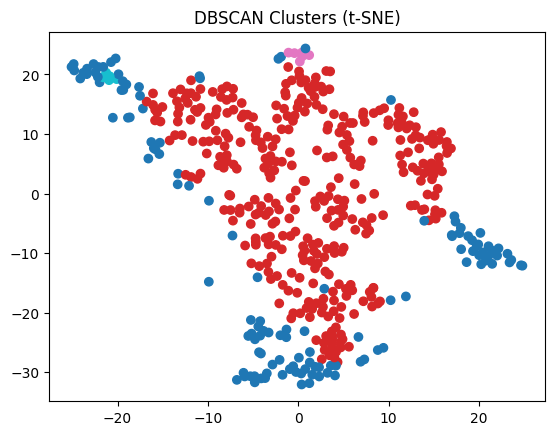

In [38]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=dbscan_model.labels_, cmap='tab10')
plt.title('DBSCAN Clusters (t-SNE)')
plt.show()


#### t-SNE Visualization
- Since our Features Are more than 3D it's Hard to Visualize

##### How to Visualize more Than 3D Features
- PCA: Most Commonly Used For both Visualization and modeling Espically For Linear Features
- t-SNE: Not Used in Modeling or Training We can just use it to Visualize or data

##### How Dimension Reduction Work?
1. It doesn't remove Feature But it reduce Dimensions without losing Data
2. We Reduce Dimensions mostly to 2D so we Can Visualize More than 2D Data


In [39]:
X_tsne[:10,1]

array([-27.170788  ,   4.862466  , -26.588251  , -31.710127  ,
       -28.371492  ,  -0.16375275, -30.429802  , -31.855421  ,
         2.132263  , -25.858074  ], dtype=float32)

In [40]:
df.groupby('cluster')[[
    'total_interactions',
    'post_ratio_engaged_consumers',
    'post_ratio_imp_reach_log',
    'post_ratio_imp_reach_like_log',
    'post_ratio_engaged_consumption_log'
]].mean()


,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
cluster,,,,,
-1,450.453125,0.785705,1.112147,1.158259,1.259801
0,131.019608,0.889678,1.014788,1.035716,1.037587
1,76.333333,0.931878,0.818419,0.893864,1.005594
2,13.400000,0.993909,1.054058,1.044507,2.120414


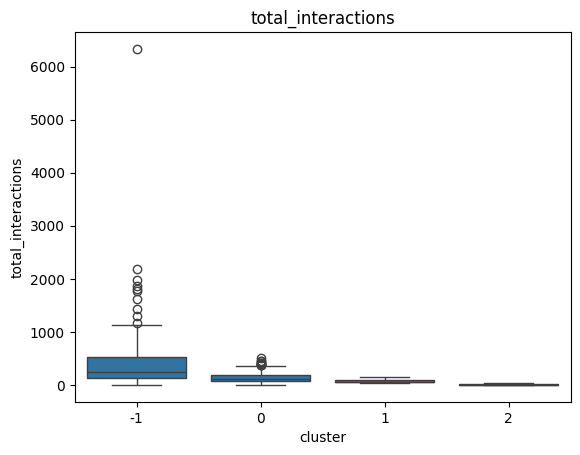

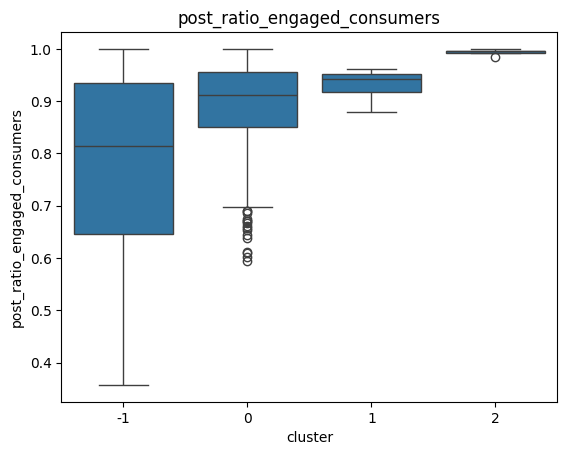

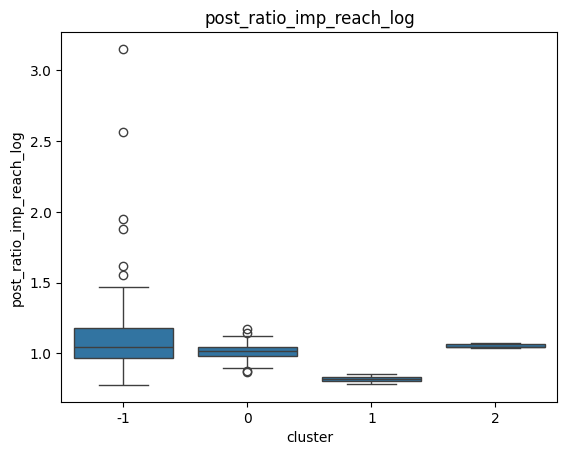

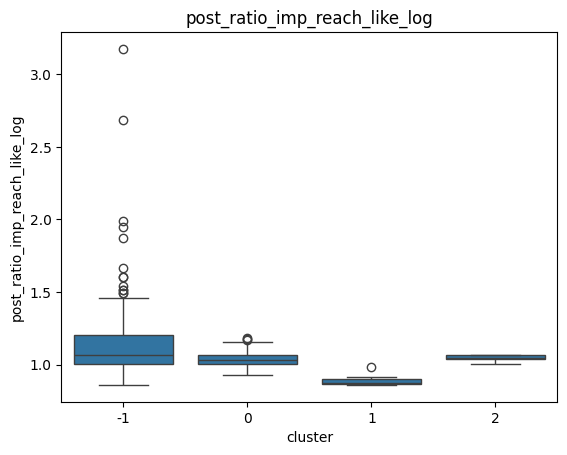

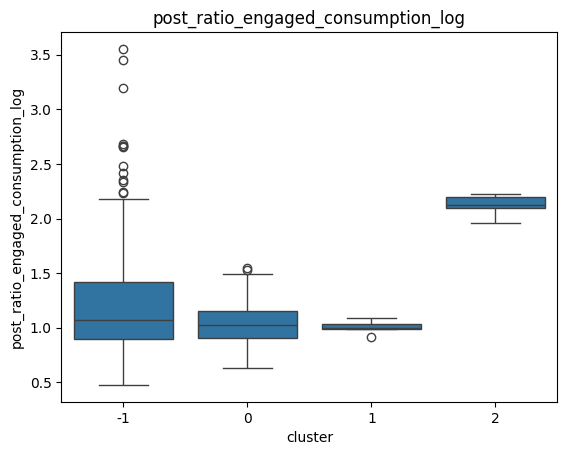

In [41]:
for col in ['total_interactions', 'post_ratio_engaged_consumers', 'post_ratio_imp_reach_log',
            'post_ratio_imp_reach_like_log','post_ratio_engaged_consumption_log']:
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(col)
    plt.show()


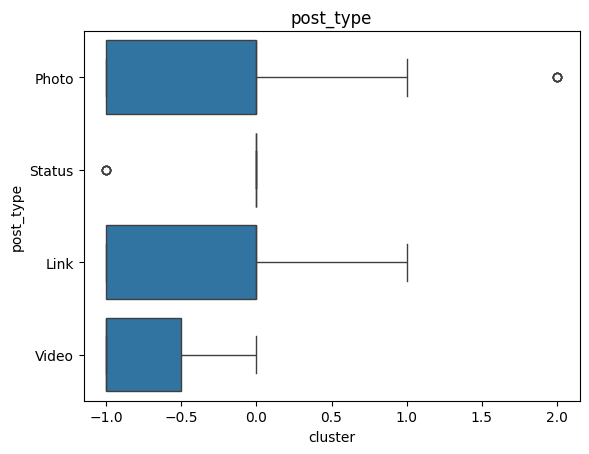

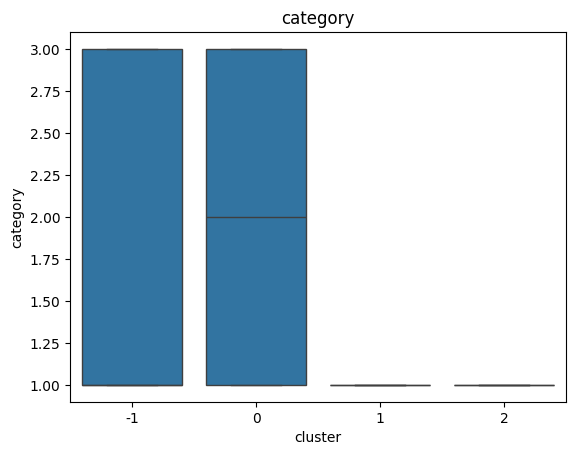

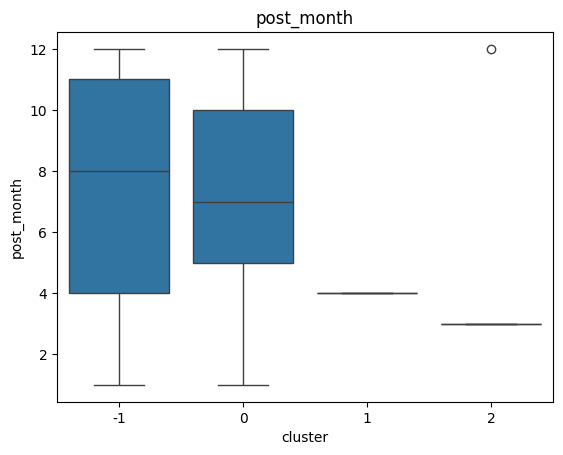

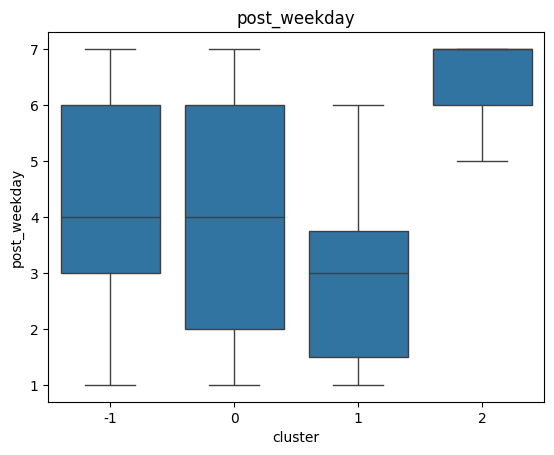

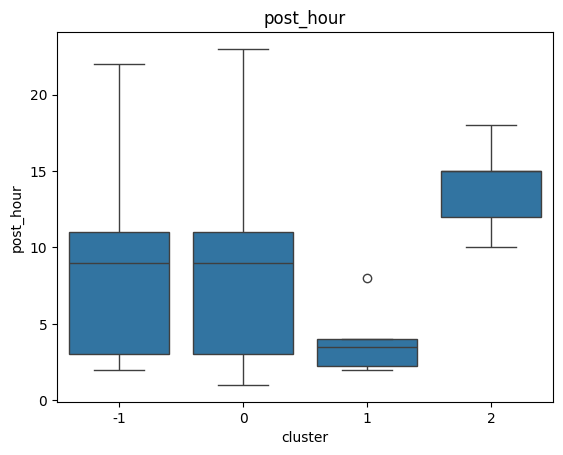

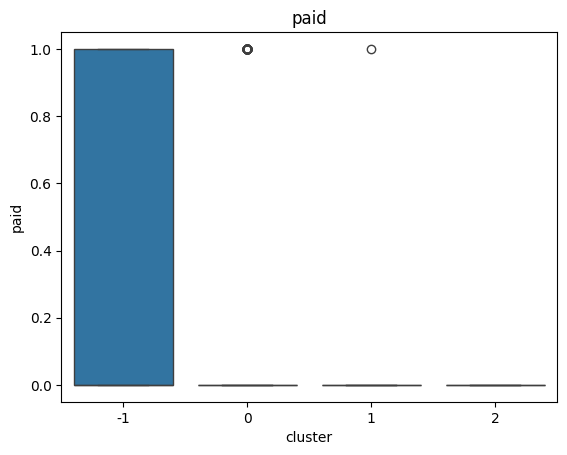

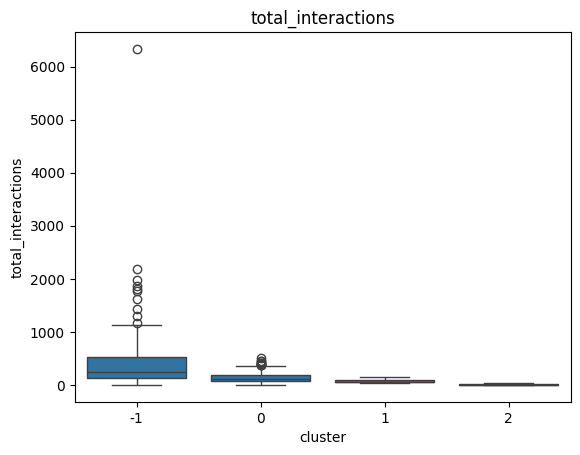

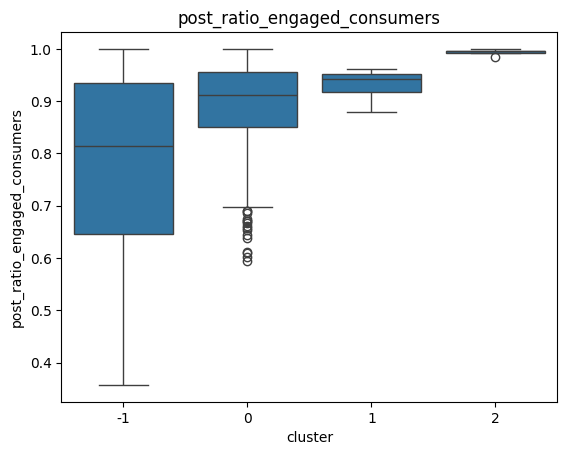

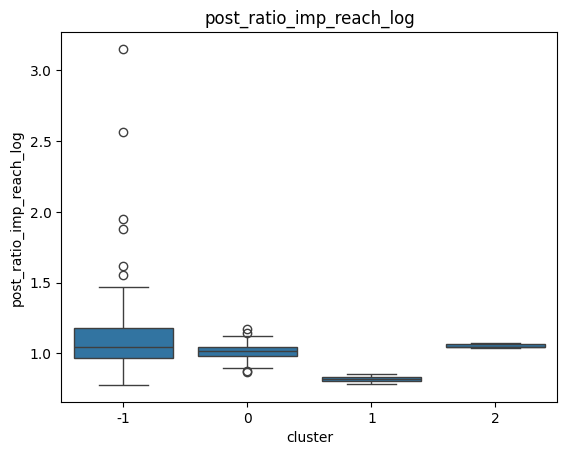

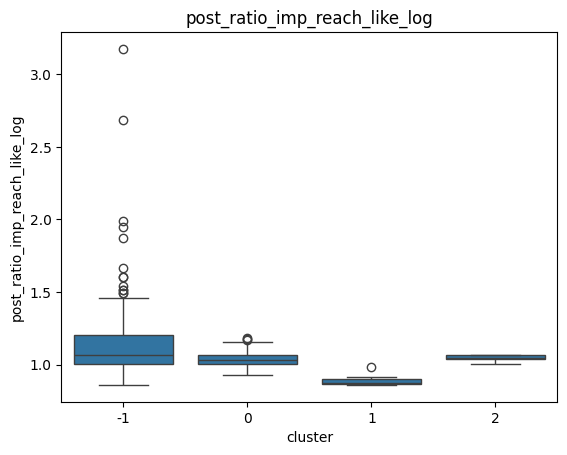

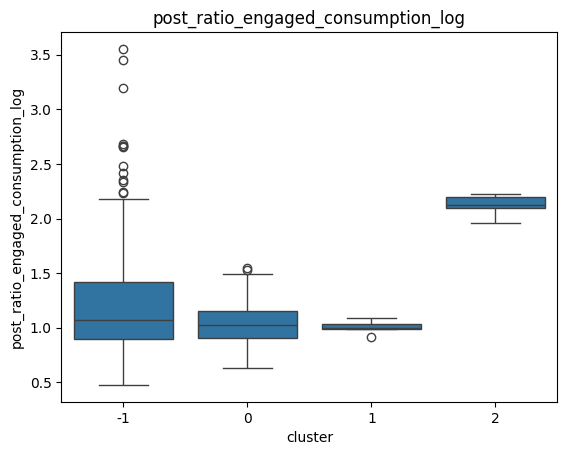

In [42]:
for col in df.columns[1:-1]:  # all scaled features
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(col)
    plt.show()


In [43]:
ss(X_scaled,df['cluster'])

0.12644832415962104

#### HyperParameter Tuning Using GridSearchCV
- GridSearchCV is A technique to use all possible combination between Parameters
- At the End you will Have the Best Score parameter that fits your Algorithm

In [44]:
epsilons = np.arange(0.2,0.8,0.05)
min_samples = [3,5,7,10]

In [45]:
combinations = list(itertools.product(epsilons,min_samples))
N = len(combinations)

In [46]:
def get_scores_and_labels(combinations,X):
    scores = [] # will store all score of each combination
    all_label_list = [] # will store each label for each combination
    for i, (eps,num_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=eps,min_samples=num_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_cluster = len(labels_set)
        if -1 in labels_set:
            num_cluster -= 1
        if (num_cluster < 2) or (num_cluster > 50):
            scores.append(-10)
            all_label_list.append('bad')
            c = (eps,num_samples)
            print(f"Combination {c} on iteration {i+1} of {N} has {num_cluster} Clusters Moving on")
            continue
        scores.append(ss(X,labels))
        all_label_list.append(labels)
        print(f"Index {i} Score {scores[-1]} Labels:{all_label_list[-1]} has {num_cluster} Clusters")
        best_index = np.argmax(scores)
        best_parameters = combinations[best_index]
        best_labels = all_label_list[best_index]
        best_score = scores[best_index]
    return{
            'best_epsilon':best_parameters[0],
            'best_min_sample':best_parameters[1],
            'best_labels':best_labels,
            'best_score':best_score
        }




In [47]:
best_dict = get_scores_and_labels(combinations,X_scaled)

Index 0 Score -0.35542517329658413 Labels:[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1  0 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1  1  4 -1  4  4  5
  1  6  1  1  4  4 -1  4  1  5  4 -1  1  5 -1 -1 -1 -1 -1 -1 -1  6 -1 -1
 -1 -1 -1 -1 -1 -1 -1  7 -1 -1 -1  2 -1 -1 -1 -1 -1  7 -1 -1  3  8 -1 -1
 -1 -1 -1  3  6 -1  7 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  7 -1 -1  8  8 -1
 -1 10 -1 -1  2  2 -1 -1  8 -1  1 -1  8  9 -1 -1  2 -1 -1 -1  9 -1 -1 -1
  9 -1 -1 -1  8 -1  1 -1  2 -1 -1 -1 -1 10  8  8 -1 -1 -1 -1 -1  8  2 -1
 -1  8 -1 -1 -1 -1  2 -1  2  2  2 -1 -1 -1 -1 -1 -1 -1  2 -1  2 -1  2  2
 -1  2 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 11 15 12  2 13 -1 -1
 -1 -1 -1  2 13  2  2 -1  2  2  2 13 14  2 -1 -1 -1  8  2  2 -1  2 -1  2
  2 11 -1

In [48]:
best_dict

{'best_epsilon': np.float64(0.7999999999999998),
 'best_min_sample': 3,
 'best_labels': array([ 0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,
         0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
         0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
 

In [49]:
df['cluster_2'] = best_dict['best_labels']

In [50]:
df['cluster_2'].value_counts()

cluster_2
 0    444
-1     49
 1      3
Name: count, dtype: int64

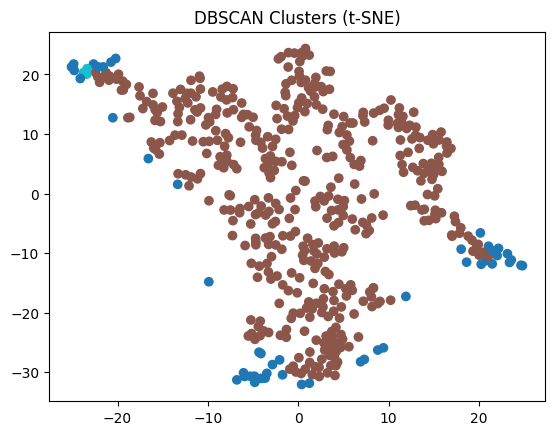

In [51]:

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df['cluster_2'], cmap='tab10')
plt.title('DBSCAN Clusters (t-SNE)')
plt.show()


In [52]:
df.groupby('cluster_2')[[
    'total_interactions',
    'post_ratio_engaged_consumers',
    'post_ratio_imp_reach_log',
    'post_ratio_imp_reach_like_log',
    'post_ratio_engaged_consumption_log'
]].mean()


,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
cluster_2,,,,,
-1,768.816327,0.750637,1.245083,1.284567,1.328090
0,150.864865,0.876267,1.015173,1.041950,1.070330
1,100.333333,0.967429,1.023025,1.007924,2.668625


In [53]:
df['cluster_2'] = df['cluster_2'].replace(1, -1)
df['cluster_2'].value_counts()

cluster_2
 0    444
-1     52
Name: count, dtype: int64

#### Conclusion Of DBSCAN
1. We Should Assign `Cluster -1` (Outlier) As Viral Post Since it had the Highest `Total_interaction` with a huge gap `566.6` and highest `ratio` in both `Engaged_consumers` and `imp_reach`finally `imp_reach_like`
2. `Cluster 1` I would Assign it as `Average or moderate` Ones since it has The Avg value of Each Column
3. While `Cluster 2` Should be Assigned to `Low` or Not-Viral since it has lowest Value but `engaged_consumptions` seems doesn't make such Effection 

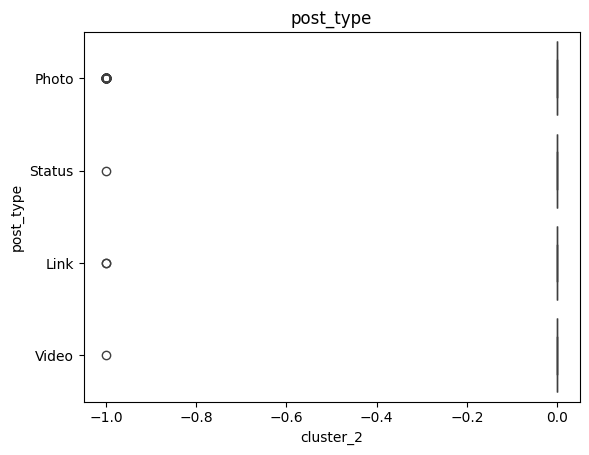

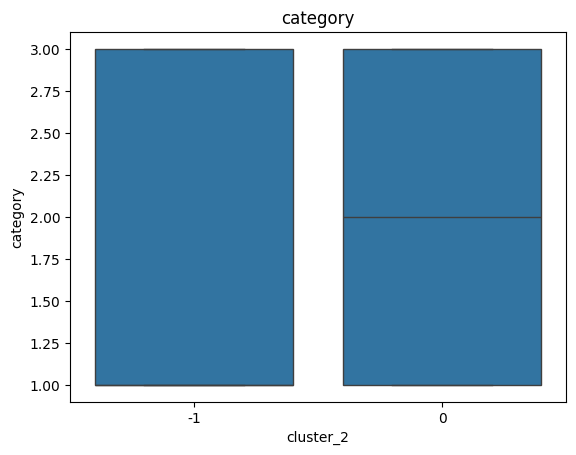

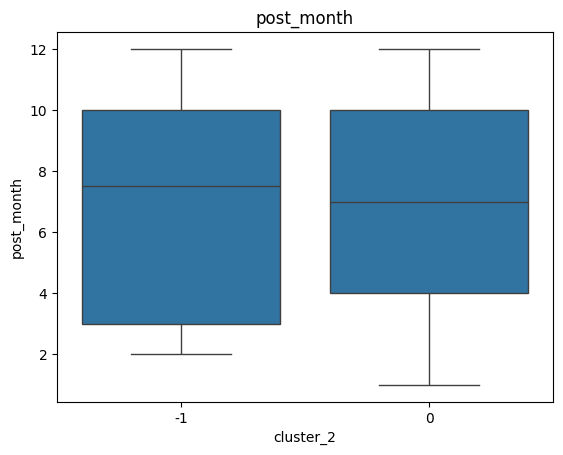

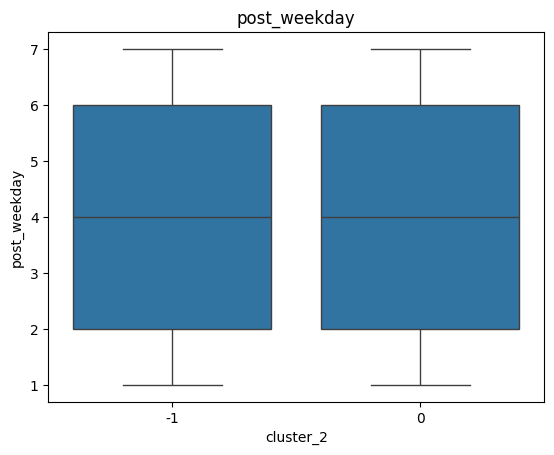

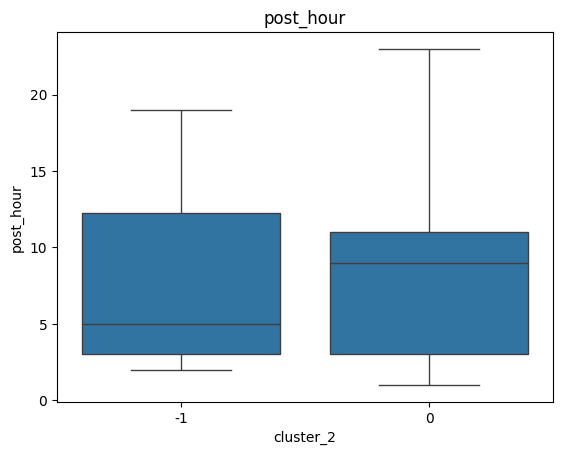

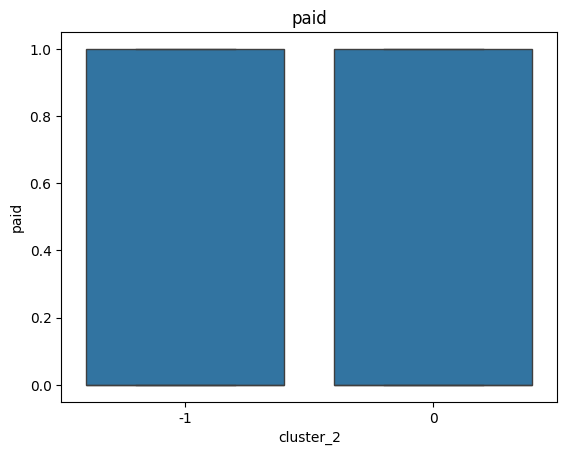

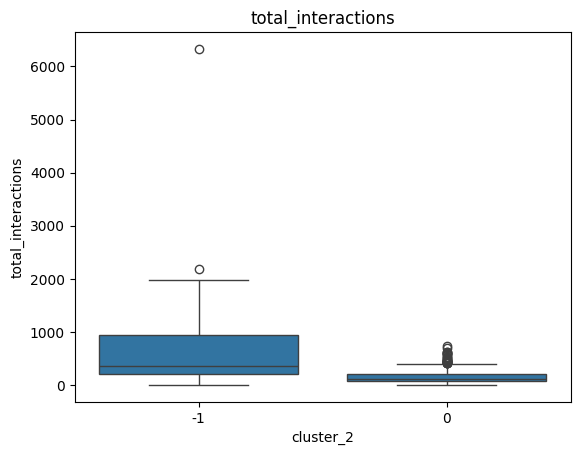

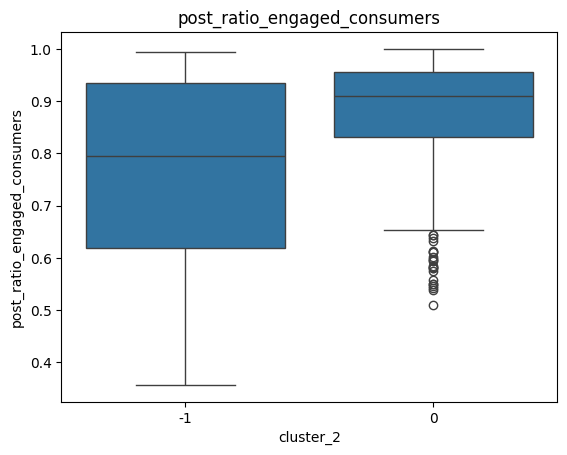

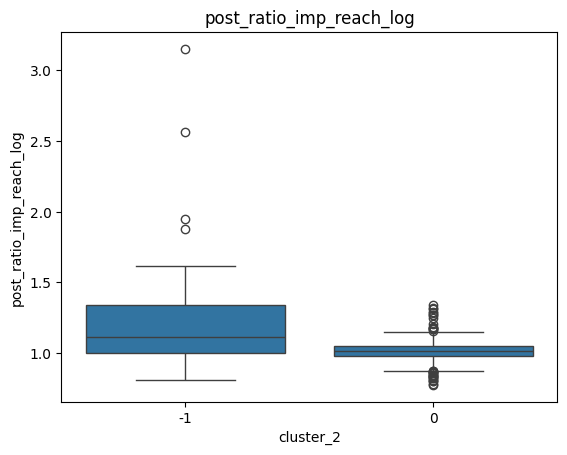

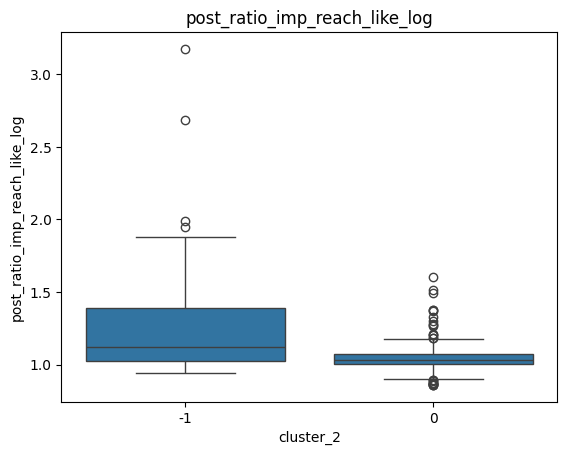

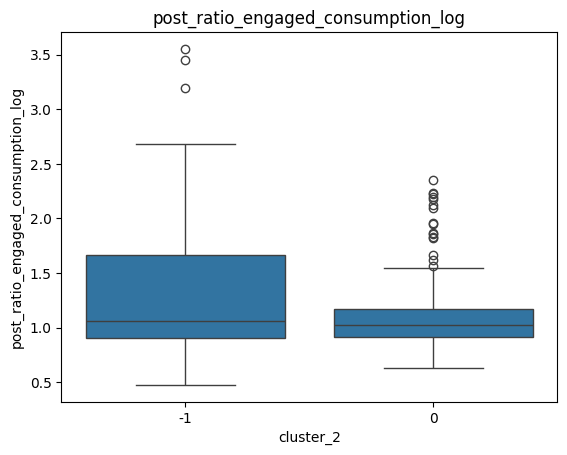

In [54]:
for col in df.columns[1:-2]:  # all scaled features
    sns.boxplot(x='cluster_2', y=col, data=df)
    plt.title(col)
    plt.show()

#### Conclusion Of the Previous Visualization
1. It seems `Category` of `-1 Cluster` Lies Between `All Categories 1, 2, 3` but as we can see that `Cluster 0` has on all of them but median of it lies on `2nd category` so it mostly produce a Medium Viral, Lastly `1 Cluster` that tells us any Category on First Category will lead to Non-Viral Post
2. `post_month` as what we have Visualized on Visualization Process There was a certain month that lead to a High Interaction And the Statistics There matches The Ones here
3. Same Comes for `Weekday` And `Post Hours`
4. `paid` For `-1 Cluster` we see that there's much people who's paying to make there post viral and there's some who's not but we can say that paying has a huge effection on Post `virality` while in other hand `Cluster 0` has lower frequency than `Cluster -1` for paid Posts so it makes since that it has a lower effect on it's post, while lastly `Cluster 1` And all of them Are Not paying for there Posts so it makes since that it has `Not-Viral` Posts
5. "The Impact of Promotion on Clustering Results: Our analysis of the paid feature reveals a clear hierarchy. Cluster -1 (Viral) shows the highest density of paid posts, confirming that financial backing is a primary driver for reaching outlier status. Cluster 0 (Mid-Range) utilizes paid promotion more sparingly, resulting in healthy but non-extreme interaction levels. Finally, Cluster 1 (Non-Viral) consists entirely of unpaid posts, suggesting that without financial amplification, content in this dataset fails to gain significant traction."
6. `Total Interactions` it so Obvious that `Clusters -1` has the Highest `Total Interaction`, while `Cluster 0` has a lower one, and finally `Cluster 1` has the lowest which makes it the `Non-Viral` Posts
7. `Engaged Consumers`, It seems that user who Consume or Engage with post Makes a huge effection on `Viral Posts` and it can be Seen with a huge gap between them
8. `imperesion reach`, Most of the Post who Got Viral or can be seen more Most Likely will be more viral And It could effect the Post same goes for `impression reach like`
9. `Engaged Consumption`, It seems That if user Has clicked multiple Time It could Effect the Post But not that much if he didn't have the Other Factors

##### So At the End Our Clustering And Score (0.44) Make Sense As we Have Visualize it

In [55]:
df['cluster_2'].value_counts()

cluster_2
 0    444
-1     52
Name: count, dtype: int64

In [56]:
ch_index = calinski_harabasz_score(X_scaled, df['cluster_2'])

print(f"Silhouette Score: {best_dict['best_score']:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.52
Calinski-Harabasz Index: 81.48


* Metric,Score,What it means for your project
Silhouette Score,0.44,"Indicates that the ""Viral"" posts (-1) are distinct from the ""Normal"" ones (0). You aren't just seeing noise; you're seeing a different behavior pattern."

* CH Index,50.51,"This measures the ratio of ""between-cluster"" vs. ""within-cluster"" variance. For social media data, which is usually messy, 50.51 shows that your 3 clusters are tight and statistically meaningful."

In [57]:
### Let's Redefine The Clusters And Makes them With A meaningful Clusters rather than just numbers

In [58]:
df['cluster_2'] = df['cluster_2'].map({-1:'Viral', 0:'Not-Viral'})

In [59]:
df['cluster_2'].value_counts()

cluster_2
Not-Viral    444
Viral         52
Name: count, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   page_total_likes                    496 non-null    int64  
 1   post_type                           496 non-null    object 
 2   category                            496 non-null    int64  
 3   post_month                          496 non-null    int64  
 4   post_weekday                        496 non-null    int64  
 5   post_hour                           496 non-null    int64  
 6   paid                                496 non-null    float64
 7   total_interactions                  496 non-null    int64  
 8   post_ratio_engaged_consumers        496 non-null    float64
 9   post_ratio_imp_reach_log            496 non-null    float64
 10  post_ratio_imp_reach_like_log       496 non-null    float64
 11  post_ratio_engaged_consumption_log  496 non-n

In [61]:
df.drop(columns=['total_interactions','post_ratio_engaged_consumers','post_ratio_imp_reach_log','post_ratio_imp_reach_like_log','post_ratio_engaged_consumption_log','cluster'],inplace=True)

In [62]:
df

,page_total_likes,post_type,category,post_month,post_weekday,post_hour,paid,cluster_2
0,139441,Photo,2,12,4,3,0.0,Not-Viral
1,139441,Status,2,12,3,10,0.0,Not-Viral
2,139441,Photo,3,12,3,3,0.0,Not-Viral
3,139441,Photo,2,12,2,10,1.0,Viral
4,139441,Photo,2,12,2,3,0.0,Not-Viral
...,...,...,...,...,...,...,...,...
491,85093,Photo,3,1,7,2,0.0,Not-Viral
492,81370,Photo,2,1,5,8,0.0,Not-Viral
493,81370,Photo,1,1,5,2,0.0,Not-Viral
494,81370,Photo,3,1,4,11,0.0,Not-Viral


In [36]:
df.to_csv('Facebook_Classification_prdiction.csv',index=False)